In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

import plotly.express as px

In [3]:
df_flickr = pd.read_csv('blip2_flickr_results.csv')
df_flickr = df_flickr.dropna(axis = 1, how = 'all')


with pd.option_context('display.max_rows', 10):
    display(df_flickr)


,txt_r1,txt_r5,txt_r10,txt_r_mean,img_r1,img_r5,img_r10,img_r_mean,r_mean,agg_metrics,...,vit_weight_bits,qformer_front_blocks,qformer_middle_blocks,qformer_end_blocks,qformer_self_attn,qformer_cross_attn,qformer_text_ff,qformer_img_ff,qformer_weight_bits,Quantized Portion
0,0.0,0.0,0.4,0.133333,0.10,0.34,0.72,0.386667,0.260000,0.133333,...,2.0,True,False,False,False,False,True,False,2.0,ViT + Q-Former
1,0.0,0.1,0.3,0.133333,0.06,0.22,0.56,0.280000,0.206667,0.133333,...,NaN,True,False,False,False,False,True,False,2.0,Q-Former
2,0.0,0.2,0.2,0.133333,0.14,0.30,0.72,0.386667,0.260000,0.133333,...,NaN,True,False,True,False,False,True,False,2.0,Q-Former
3,0.0,0.3,0.4,0.233333,0.14,0.42,0.62,0.393333,0.313333,0.233333,...,2.0,True,False,False,True,True,True,False,2.0,ViT + Q-Former
4,0.0,0.3,0.7,0.333333,0.16,0.60,1.08,0.613333,0.473333,0.333333,...,2.0,False,True,False,True,True,True,False,2.0,ViT + Q-Former
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,98.0,100.0,100.0,99.333333,88.12,97.88,98.82,94.940000,97.136667,99.333333,...,2.0,False,True,False,False,False,False,False,2.0,ViT + Q-Former
976,98.0,100.0,100.0,99.333333,88.12,97.88,98.82,94.940000,97.136667,99.333333,...,2.0,False,False,False,False,False,False,False,NaN,ViT
977,98.0,100.0,100.0,99.333333,89.60,98.10,98.96,95.553333,97.443333,99.333333,...,NaN,True,True,True,True,True,False,True,4.0,Q-Former
978,98.0,100.0,100.0,99.333333,89.66,98.10,98.92,95.560000,97.446667,99.333333,...,NaN,False,True,True,True,True,False,True,4.0,Q-Former


In [4]:
df_flickr.columns

Index(['txt_r1', 'txt_r5', 'txt_r10', 'txt_r_mean', 'img_r1', 'img_r5',
       'img_r10', 'img_r_mean', 'r_mean', 'agg_metrics', 'model_size',
       'visual_encoder_block_modules', 'visual_encoder_block_indices',
       'visual_encoder_block_weight_bits', 'qformer_layer_indices',
       'qformer_self_attention_modules', 'qformer_self_attention_weight_bits',
       'qformer_cross_attention_modules',
       'qformer_cross_attention_weight_bits', 'qformer_text_ff_modules',
       'qformer_text_ff_weight_bits', 'qformer_img_ff_modules',
       'qformer_img_ff_weight_bits', 'job_batch', 'vit_attn', 'vit_ff',
       'vit_front_blocks', 'vit_middle_blocks', 'vit_end_blocks',
       'vit_weight_bits', 'qformer_front_blocks', 'qformer_middle_blocks',
       'qformer_end_blocks', 'qformer_self_attn', 'qformer_cross_attn',
       'qformer_text_ff', 'qformer_img_ff', 'qformer_weight_bits',
       'Quantized Portion'],
      dtype='object')

## ViT Only Runs

In [5]:
df_vit = df_flickr[df_flickr.job_batch == 'nbit_vit']
df_vit

,txt_r1,txt_r5,txt_r10,txt_r_mean,img_r1,img_r5,img_r10,img_r_mean,r_mean,agg_metrics,...,vit_weight_bits,qformer_front_blocks,qformer_middle_blocks,qformer_end_blocks,qformer_self_attn,qformer_cross_attn,qformer_text_ff,qformer_img_ff,qformer_weight_bits,Quantized Portion
17,0.0,0.5,0.9,0.466667,0.16,0.50,0.98,0.546667,0.506667,0.466667,...,2.0,False,False,False,False,False,False,False,NaN,ViT
26,0.1,0.3,0.6,0.333333,0.14,0.76,1.54,0.813333,0.573333,0.333333,...,2.0,False,False,False,False,False,False,False,NaN,ViT
30,0.1,0.3,0.8,0.400000,0.32,0.84,1.18,0.780000,0.590000,0.400000,...,2.0,False,False,False,False,False,False,False,NaN,ViT
32,0.1,0.3,0.9,0.433333,0.06,0.40,1.08,0.513333,0.473333,0.433333,...,2.0,False,False,False,False,False,False,False,NaN,ViT
53,0.1,0.5,0.8,0.466667,0.10,0.44,1.00,0.513333,0.490000,0.466667,...,2.0,False,False,False,False,False,False,False,NaN,ViT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,97.8,100.0,100.0,99.266667,89.68,98.08,98.94,95.566667,97.416667,99.266667,...,6.0,False,False,False,False,False,False,False,NaN,ViT
961,97.8,100.0,100.0,99.266667,89.82,98.16,98.96,95.646667,97.456667,99.266667,...,6.0,False,False,False,False,False,False,False,NaN,ViT
963,97.8,100.0,100.0,99.266667,89.82,98.16,98.98,95.653333,97.460000,99.266667,...,6.0,False,False,False,False,False,False,False,NaN,ViT
972,97.9,100.0,100.0,99.300000,89.78,98.12,98.90,95.600000,97.450000,99.300000,...,4.0,False,False,False,False,False,False,False,NaN,ViT


In [7]:
df_vit.loc[:,'vit_weight_bits'] = df_vit.vit_weight_bits.astype(str)

fig = px.scatter_3d(df_vit, x='img_r1', y="txt_r1", z = 'model_size',
                 color = 'vit_weight_bits',
                 hover_data=['vit_attn', 'vit_ff',
                             'vit_front_blocks', 'vit_middle_blocks', 'vit_end_blocks',
                             'vit_weight_bits'])

fig.update_xaxes(autorange="reversed")

fig.show()

## Multi-Dimensional Plots

In [9]:
fig = px.scatter_3d(df_flickr, x='img_r1', y="txt_r1", z = 'model_size',
                 color = 'Quantized Portion',
                 hover_data=['vit_attn', 'vit_ff',
                             'vit_front_blocks', 'vit_middle_blocks', 'vit_end_blocks',
                             'vit_weight_bits'])

fig.update_xaxes(autorange="reversed")
fig.write_html("flickr_plot_all.html")

fig.show()

In [38]:
df_txt_pivot = df_flickr.pivot_table(values=['txt_r1'],
                                  index= ['qformer_weight_bits', 
                                          'qformer_front_blocks', 'qformer_middle_blocks', 'qformer_end_blocks', 
                                          'qformer_self_attn', 'qformer_cross_attn',
                                          'qformer_text_ff', 'qformer_img_ff'], 
                                    
                                  columns=['vit_weight_bits', 
                                           'vit_front_blocks', 'vit_middle_blocks', 'vit_end_blocks',
                                           'vit_attn', 'vit_ff',])

# aribitrary large negative value for color map
df_txt_pivot = df_txt_pivot.fillna(-50)

df_txt_pivot

txt_r5  \
vit_weight_bits                                                                                                                                          2.0   
vit_front_blocks                                                                                                                                       False   
vit_middle_blocks                                                                                                                                      False   
vit_end_blocks                                                                                                                                         True    
vit_attn                                                                                                                                               False   
vit_ff                                                                                                                                                 True    
qformer_weight_bits qformer_front_blocks qformer_middle_blocks qformer_end_blocks qformer_self_attn qformer_cross_attn qformer_text_ff qformer_img_ff          
2.0                 False                False                 True               False             False              False           False             0.5   
                                                                                                                                       True              0.4   
                                                                                                                       True            False             0.5   
                                                                                                                                       True              0.7   
                                                                                  True              True               False           False             0.4   
...                                                                                                                                                      ...   
8.0                 True                 True                  True               False             False              True            True            -50.0   
                                                                                  True              True               False           False           -50.0   
                                                                                                                                       True            -50.0   
                                                                                                                       True            False           -50.0   
                                                                                                                                       True            -50.0   

                                                                                                                                                             \
vit_weight_bits                                                                                                                                               
vit_front_blocks                                                                                                                                              
vit_middle_blocks                                                                                                                                             
vit_end_blocks                                                                                                                                                
vit_attn                                                                                                                                              True    
vit_ff                                                                                                                                                False

/fs/nexus-scratch/vla/micromamba/envs/VIT/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/fs/nexus-scratch/vla/micromamba/envs/VIT/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 640x480 with 0 Axes>

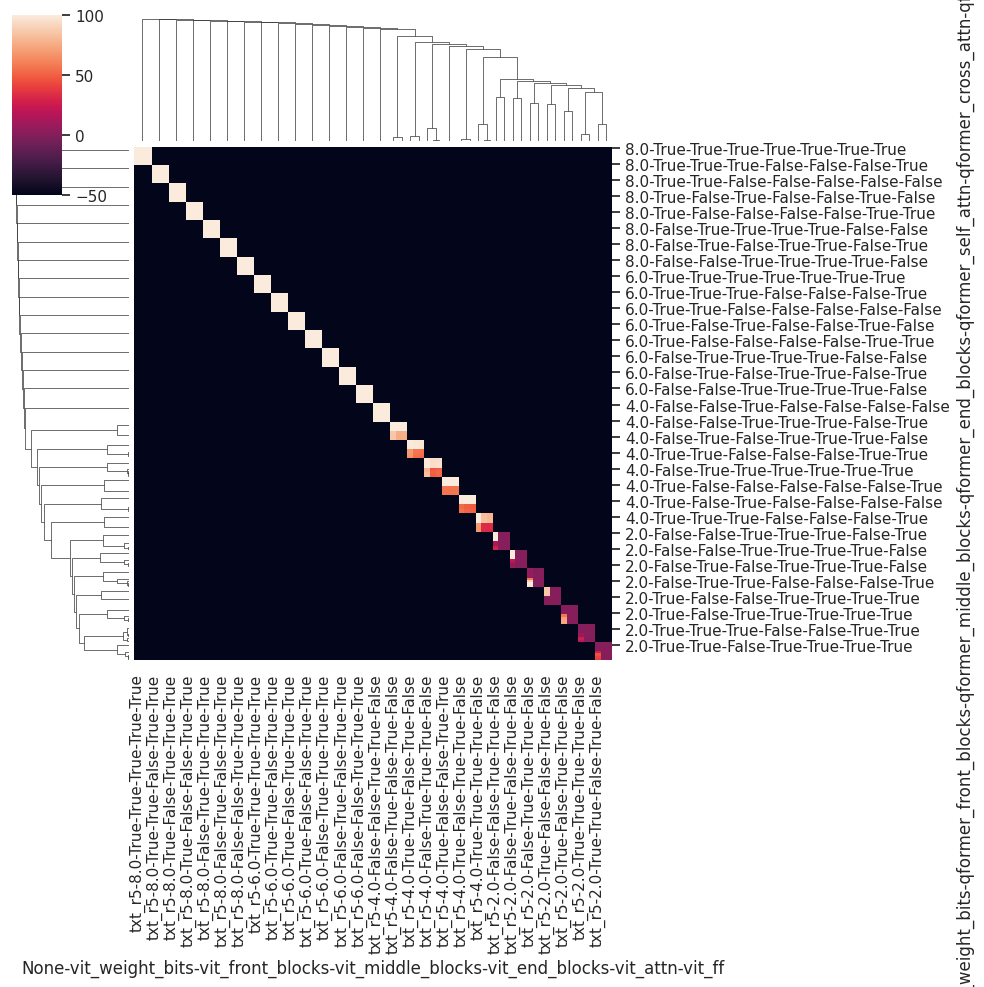

In [39]:
sns.set_theme()
plt.tight_layout()
sns.clustermap(df_txt_pivot, annot=False)

In [40]:
df_img_pivot = df_flickr.pivot_table(values=['img_r1'],
                                  index= ['qformer_weight_bits', 
                                          'qformer_front_blocks', 'qformer_middle_blocks', 'qformer_end_blocks', 
                                          'qformer_self_attn', 'qformer_cross_attn',
                                          'qformer_text_ff', 'qformer_img_ff'], 
                                    
                                  columns=['vit_weight_bits', 
                                           'vit_front_blocks', 'vit_middle_blocks', 'vit_end_blocks',
                                           'vit_attn', 'vit_ff',])

# aribitrary large negative value for color map
df_img_pivot = df_img_pivot.fillna(-50)

df_img_pivot

img_r1  \
vit_weight_bits                                                                                                                                          2.0   
vit_front_blocks                                                                                                                                       False   
vit_middle_blocks                                                                                                                                      False   
vit_end_blocks                                                                                                                                         True    
vit_attn                                                                                                                                               False   
vit_ff                                                                                                                                                 True    
qformer_weight_bits qformer_front_blocks qformer_middle_blocks qformer_end_blocks qformer_self_attn qformer_cross_attn qformer_text_ff qformer_img_ff          
2.0                 False                False                 True               False             False              False           False            0.20   
                                                                                                                                       True             0.20   
                                                                                                                       True            False            0.20   
                                                                                                                                       True             0.18   
                                                                                  True              True               False           False            0.18   
...                                                                                                                                                      ...   
8.0                 True                 True                  True               False             False              True            True           -50.00   
                                                                                  True              True               False           False          -50.00   
                                                                                                                                       True           -50.00   
                                                                                                                       True            False          -50.00   
                                                                                                                                       True           -50.00   

                                                                                                                                                              \
vit_weight_bits                                                                                                                                                
vit_front_blocks                                                                                                                                               
vit_middle_blocks                                                                                                                                              
vit_end_blocks                                                                                                                                                 
vit_attn                                                                                                                                               True    
vit_ff                                                                                                                                               

/fs/nexus-scratch/vla/micromamba/envs/VIT/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/fs/nexus-scratch/vla/micromamba/envs/VIT/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 640x480 with 0 Axes>

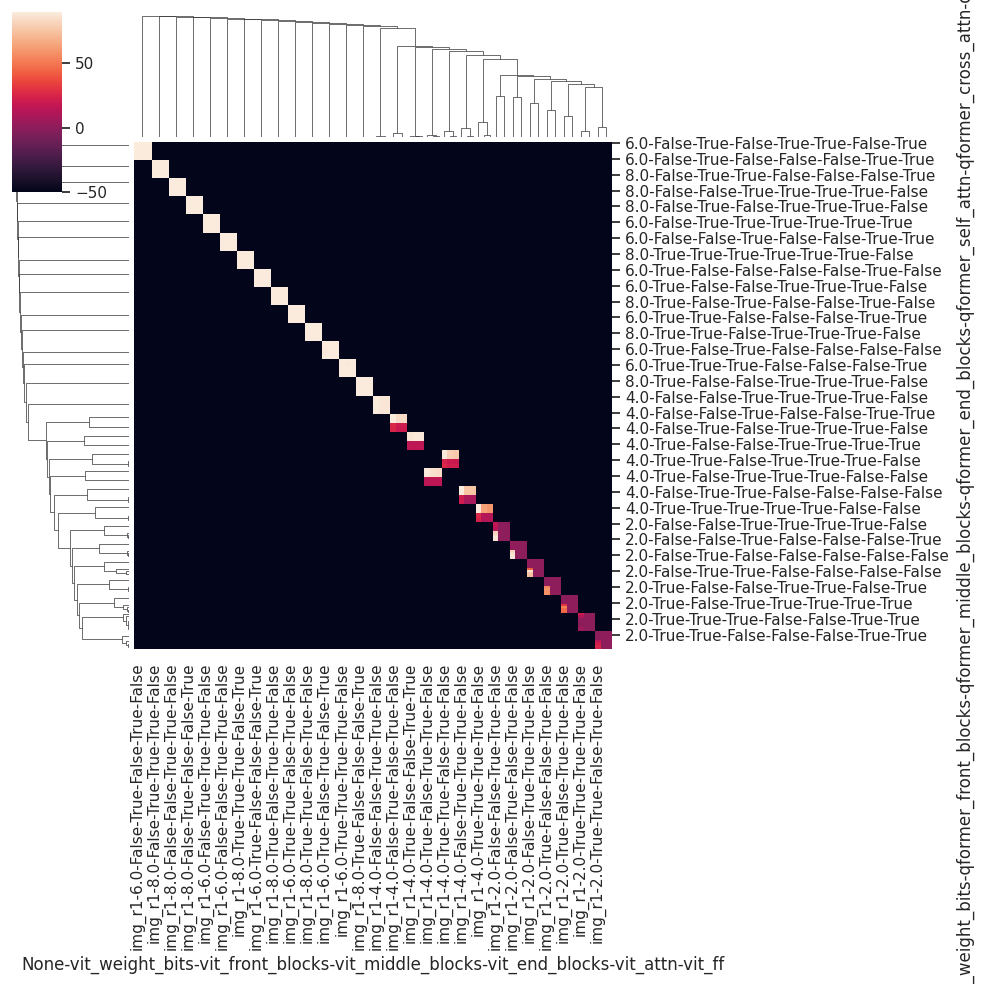

In [42]:
sns.set_theme()
plt.tight_layout()
sns.clustermap(df_img_pivot, annot=False)

In [48]:
def reduce_df(df, class_col):
    
    # CLI_ARG_COLS = ['visual_encoder_block_modules', 'visual_encoder_block_indices',
    #                 'visual_encoder_block_weight_bits', 'qformer_layer_indices',
    #                 'qformer_self_attention_modules', 'qformer_self_attention_weight_bits',
    #                 'qformer_cross_attention_modules',
    #                 'qformer_cross_attention_weight_bits', 'qformer_text_ff_modules',
    #                 'qformer_text_ff_weight_bits', 'qformer_img_ff_modules',
    #                 'qformer_img_ff_weight_bits']
    
    COLS = ['vit_attn', 'vit_ff',
            'vit_front_blocks', 'vit_middle_blocks', 'vit_end_blocks',
            'vit_weight_bits', 'qformer_front_blocks', 'qformer_middle_blocks',
            'qformer_end_blocks', 'qformer_self_attn', 'qformer_cross_attn',
            'qformer_text_ff', 'qformer_img_ff', 'qformer_weight_bits']
    
    return df[[class_col] + COLS]

In [51]:
df_test = reduce_df(df_flickr, 'txt_r1')
df_test.columns

Index(['txt_r1', 'vit_attn', 'vit_ff', 'vit_front_blocks', 'vit_middle_blocks',
       'vit_end_blocks', 'vit_weight_bits', 'qformer_front_blocks',
       'qformer_middle_blocks', 'qformer_end_blocks', 'qformer_self_attn',
       'qformer_cross_attn', 'qformer_text_ff', 'qformer_img_ff',
       'qformer_weight_bits'],
      dtype='object')

In [ ]:
df_test['txt_r1_range'] = for x in df_test['txt_r1']]

array([[<Axes: title={'center': 'txt_r1'}>]], dtype=object)

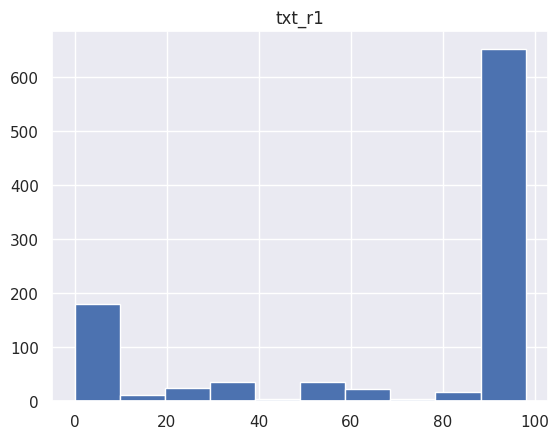

In [56]:
df_test.hist('txt_r1')

In [55]:
df_test.txt_r1.unique()

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.9,  1. ,  1.2,
        1.3,  1.4,  1.5,  1.9,  2. ,  2.2,  2.3,  2.4,  2.5,  3.5,  3.6,
        4. ,  4.5,  5.2,  6.3,  7.1,  8. ,  8.4,  9.2, 10.9, 11.9, 12. ,
       15.1, 17. , 18.2, 18.4, 18.6, 18.9, 19. , 19.7, 20. , 20.1, 20.3,
       20.7, 21.2, 22.1, 23.8, 25.7, 26. , 26.1, 26.5, 26.7, 27.1, 27.3,
       27.6, 27.7, 27.9, 28.2, 28.9, 29.1, 29.3, 29.6, 30.7, 33.3, 33.4,
       33.5, 33.7, 33.8, 34. , 34.1, 34.2, 34.4, 34.6, 35.4, 35.5, 35.6,
       35.8, 35.9, 36. , 36.1, 36.2, 36.6, 37.1, 37.5, 38.4, 39. , 39.1,
       39.8, 40. , 48.1, 49.1, 49.3, 50.1, 50.8, 50.9, 51.3, 51.6, 51.9,
       52.1, 53. , 53.2, 53.3, 53.4, 53.6, 53.7, 53.8, 54. , 54.3, 54.4,
       54.6, 54.8, 55.2, 56.5, 56.6, 58.1, 58.3, 58.5, 59.7, 60. , 60.3,
       61. , 63.2, 63.4, 64.2, 64.7, 64.8, 65.1, 65.9, 66. , 66.1, 68.5,
       69.6, 70.8, 71.4, 81.3, 82.1, 82.4, 83.3, 83.4, 83.8, 84. , 84.2,
       84.6, 84.9, 85.2, 85.6, 86.1, 87. , 89.1, 89